<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

Имеются данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv')
data.head()

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


Данные склеены в одну строку из-за разделителей в формате csv. Необходимо указать при чтении файла разделитель знак табуляции.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

Данные содержат 23699 записей, во многих столбцах имеются пропуски, 14 столбцов имеют формат float64. Необходимо детальнее определить и изучить пропущенные значения, возможно их можно заполнить. Также проверим и приведем данные к нужным типам.

## Предобработка данных

Проверим данные на дубликаты

In [4]:
print('Количество дубликатов: ', data.duplicated().sum())

Количество дубликатов:  0


Определим количестов пропусков в столбцах

In [5]:
#data[data['ceiling_height'].isna()]
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Больше всего пропусков в is_apartment. Поскольку значения в этом столбце имеют тип bool, логично предположить, что отсутствие данных здесь предполагают знчение False. Заменим пропуски на это значение.

In [6]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Много пропусков количества балконов, скорее всего оно не указано, т.к. балконов нет, меняем пропукски на 0

In [7]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Пропуски в столбце locality_name восстановить сложно, возможно это проблемы выгрузки или например  название населенного пункта отсутсвовало в каком-то списке. Заменим пропуcки на значение "другие"

In [8]:
data['locality_name'] = data['locality_name'].fillna('другие')
data['locality_name'].isna().sum()

0

Посмотрим на значения столбца высоты потолков

In [9]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

В столбце наблюдаются выбросы в 1 и 100 метров, похоже на ошибки. Основная масса значений лежит в диапазоне до 3 метров. Посмотрим распределение значений на гистограмме.

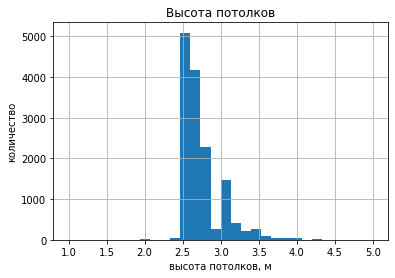

In [10]:
ax = data['ceiling_height'].hist(bins=30, range = (1, 5))
ax.set_title('Высота потолков')
ax.set_xlabel('высота потолков, м')
ax.set_ylabel('количество')
plt.show()

Основная масса значений распределилась в диапазоне 2.4-2.8 метра, пик наблюдается на медианном 2.65м. Также есть всплеск на высоте 3.1. Значения меньше 2м и больше 4.5 единичны.
Заполним пропуски в столбце ceiling_height медианным значением.

In [11]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)
data['ceiling_height'].isna().sum()

0

In [12]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропущенные значения в столбцах parks_around3000 и ponds_around3000 запоним 0, т.к. логично предположить, что их скорее всего не заполнили в связи с отсутствием водоемов и парков в радиусе 3 км.

In [13]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum()

0

In [14]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isna().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

In [16]:
data['days_exposition'].isna().sum()

3181

В столбце days_exposition пропущены 3181 значение. Отсутствие записей в столбце days_exposition могут быть связаны с тем, что на момент выгрузки данных объявления еще были активны и не сняты, либо произошли ошибки при рассчетах количества дней размещения объявлений, либо еще какие-то ошибки или утеря данных. Если заполнить их к примеру средним или медианным значением, то это приведет к пикообразным выбросам на этих значениях, т.к. количество пропусков составляет больше 13%. Это приведет к искажению итоговых результатов с использованем данных этого столбца. Оставим здесь пропуски как есть. 

Пропуски в столбце kitchen_area предположительно могут быть связаны с отсутствием кухни как отдельного помещения, в таком случае заменим пропуски 0

In [17]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)
data['kitchen_area'].isna().sum()

0

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Остались пропуски в столбцах floors_total, living_area, их восстановить невозможно, вероятно утеряны при выгрузках или не заполнены при подаче объявлений. Оставим их как есть. Столбцы airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest были заполнены автоматически и вероятно связаны с ошибками работы алгоритмов или отсутвием таковых объектов вблизи адресов. Оставляем эти данные в таком же виде. 

В процессе работы с данными выявлены несоответствия типов данных в некоторых столбцах, необходимо их изменить. Будем приводить к типу int значения столбцов которые подразумевают и содержат целые числа, но хранятся как float64:
airports_nearest, balcony, cityCenters_nearest, days_exposition, floors_total, last_price, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest

In [19]:
columns_for_int = [
    'airports_nearest', 'balcony', 'cityCenters_nearest',
    'days_exposition', 'floors_total', 'last_price',
    'parks_around3000', 'parks_nearest', 'ponds_around3000',
    'ponds_nearest']
data[columns_for_int] = data[columns_for_int].astype('float32').astype('Int64')

Значения столбца first_day_exposition являются датой публикации, но хранятся в строковом формате, переведем их в формат datetime64.

In [20]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,11.00,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,0.00,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,14.40,1,посёлок Парголово,52996,19143,0,NaN,0,NaN,155
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,18.90,2,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,6.50,2,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null Int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23613 non-null Int64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null Int64
locality_name           23699 non-null object
airports_nearest        18157 non-null Int64
cityCenters_nearest     18180 non-null Int64
parks_around3000        23699 non-null Int64
parks_nearest           8079 non-null Int64
ponds_around3000      

## Расчёты и добавление результатов в таблицу

Добавим в таблицу цену квадратного метра с округлением до целого

In [22]:
data['meter_price'] = (round(data['last_price'] / data['total_area'])).astype('int')

In [23]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,NaN,120370
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,посёлок Шушары,12817,18603,0,NaN,0,NaN,81,82921
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92786
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000


Добавим в таблицу день недели (значения от 0 до 6 соответствуют значениям с понедельника по воскресенье), месяц и год публикации объявления

In [24]:
data['dayofweek_publication'] = data['first_day_exposition'].dt.dayofweek
data['month_publication'] = data['first_day_exposition'].dt.month
data['year_publication'] = data['first_day_exposition'].dt.year

In [25]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayofweek_publication,month_publication,year_publication
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028,1,482,2,755,NaN,120370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603,0,NaN,0,NaN,81,82921,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933,1,90,2,574,558,92786,3,8,2015
3,0,64900000,159.0,2015-07-24,3,2.65,14,NaN,9,False,...,6800,2,84,3,234,424,408176,4,7,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,8098,2,112,1,48,121,100000,1,6,2018


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 26 columns):
total_images             23699 non-null int64
last_price               23699 non-null Int64
total_area               23699 non-null float64
first_day_exposition     23699 non-null datetime64[ns]
rooms                    23699 non-null int64
ceiling_height           23699 non-null float64
floors_total             23613 non-null Int64
living_area              21796 non-null float64
floor                    23699 non-null int64
is_apartment             23699 non-null bool
studio                   23699 non-null bool
open_plan                23699 non-null bool
kitchen_area             23699 non-null float64
balcony                  23699 non-null Int64
locality_name            23699 non-null object
airports_nearest         18157 non-null Int64
cityCenters_nearest      18180 non-null Int64
parks_around3000         23699 non-null Int64
parks_nearest            8079 non-null Int64
pon

Добавим в таблицу тип этажа квартиры, категории: первый, последний, другой. Для этого создадим функцию определяющую и возвращающую категорию этажа

In [27]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [28]:
data['floor_category'] = data.apply(floor_category, axis=1)

Проверяем корректность распределения по категориям

In [29]:
data[['floor', 'floors_total', 'floor_category']].head(15)

,floor,floors_total,floor_category
0,8,16,другой
1,1,11,первый
2,4,5,другой
3,9,14,другой
4,13,14,другой
5,5,12,другой
6,6,26,другой
7,22,24,другой
8,26,27,другой
9,7,9,другой


Добавляем в таблицу соотношение жилой площади к общей и площади кухни к общей, округляем до 2 знаков в дробной части.

In [30]:
data['living_to_total_ratio'] = round(data['living_area'] / data['total_area'], 2)
data['kitchen_to_total_ratio'] = round(data['kitchen_area'] / data['total_area'], 2)

In [31]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,meter_price,dayofweek_publication,month_publication,year_publication,floor_category,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755,NaN,120370,3,3,2019,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0,NaN,81,82921,1,12,2018,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2,574,558,92786,3,8,2015,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24,3,2.65,14,NaN,9,False,...,3,234,424,408176,4,7,2015,другой,NaN,0.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48,121,100000,1,6,2018,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0,NaN,55,95066,0,9,2018,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0,NaN,155,99196,3,11,2017,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18,2,2.65,24,NaN,22,False,...,0,NaN,NaN,110545,3,4,2019,другой,NaN,0.26
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,0,NaN,189,87455,2,5,2018,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289,88525,6,2,2017,другой,0.71,0.11


## Исследовательский анализ данных

Изучаем параметры: площадь, цена, число комнат, высота потолков. Рассмотрим распределение общей площади:

In [32]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

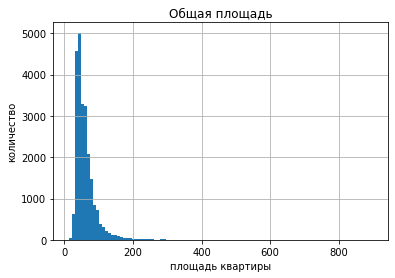

In [33]:
ax = data['total_area'].plot(
    kind='hist',
    bins=100,
    grid=True
)
ax.set_title('Общая площадь')
ax.set_xlabel('площадь квартиры')
ax.set_ylabel('количество')
plt.show()

Наиболее часто продаваемые квартиры площадью 30-50 метров, редко встречаются предложения меньше 20 метров и больше 300. Отмечается несколько пиков, очевидно это связано с метражом квартир стандартных планиовок и типовым строительством. Гистограмма имеет длинный хвост вправо, с ростом площади количество предложений снижается. 
    
Рассмотрим распределение цен:

In [34]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

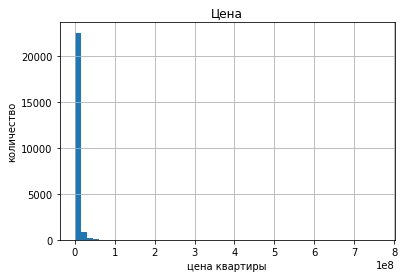

In [35]:
ax = data['last_price'].plot(
    kind='hist',
    bins=50,   
    grid=True
)
ax.set_title('Цена')
ax.set_xlabel('цена квартиры')
ax.set_ylabel('количество')
plt.show()

Значения на гистограмме сосредоточены от 0 до 50 млн. Дальше частота низкая и сливается с 0. Минимальное значение 12190 руб, что как-то мало для недвижимости, может выброс? Посмотрим распределение цен на участке от 0 до 500 тыс руб.

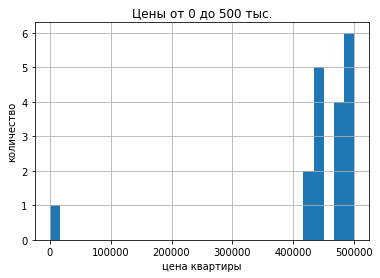

In [36]:
ax = data['last_price'].plot(
    kind='hist',
    bins=30,
    grid=True,
    range=(0, 500000)
)
ax.set_title('Цены от 0 до 500 тыс.')
ax.set_xlabel('цена квартиры')
ax.set_ylabel('количество')
plt.show()

Так и есть, минимальное значение явно выбивается. Посмотрим на гистограмму на участке 400тыс-500млн:

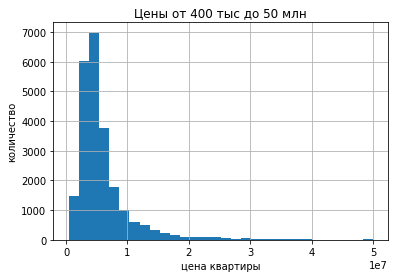

In [37]:
ax = data['last_price'].plot(
    kind='hist',
    bins=30,
    grid=True,
    range=(400000, 50000000)
)
ax.set_title('Цены от 400 тыс до 50 млн')
ax.set_xlabel('цена квартиры')
ax.set_ylabel('количество')
plt.show()

Гистограмма распределения цен близка к нормальному распределению, но как и распределение общей площади имеет хвост вправо, что вероятно связано с ростом стоимости от метража. Пик предложений в районе 4-5 млн.

Рассмотрим распределение прердложений по количеству комнат:

In [38]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

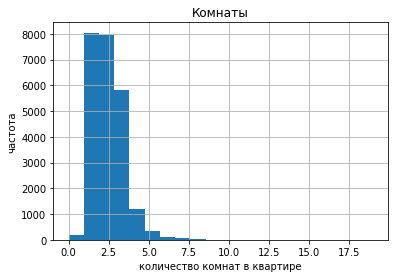

In [39]:
ax = data['rooms'].plot(
    kind='hist',
    bins=20,
    grid=True,
)
ax.set_title('Комнаты')
ax.set_xlabel('количество комнат в квартире')
ax.set_ylabel('частота')
plt.show()

Наиболее часто, практически в равной степени продаются 1,2-х комнатные квартиры, самые популярные и доступные. Далее 3-комнатные. Есть довольно много с количеством комнат 0, что это значит не понятно, возможно значение-заглушка пропусков. После 8 комнат - значения единичные.

Посмотрим на высоту потолков:

In [40]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

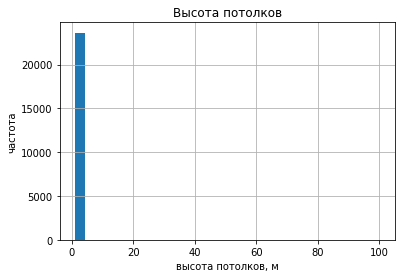

In [41]:
ax = data['ceiling_height'].plot(
    kind='hist',
    bins=30,
    grid=True,
)
ax.set_title('Высота потолков')
ax.set_xlabel('высота потолков, м')
ax.set_ylabel('частота')
plt.show()

Все значения сосредосточились примерно до 4 метров.Строительство у нас стандартизировно, стандартная высота потолков 2.5-2.7 м. В Санкт-Петербурге много домов старой постройки, где высота потолков может оличаться от стандартной, отсюда вероятно наличие высот 3-4 метра. Ну и еще кто как измерял, думаю есть варианты определенные "на глазок". Значения в 1 м и 100 м, похожи на ошибки. Посторим рапсределение на учатке 2-5 метров.

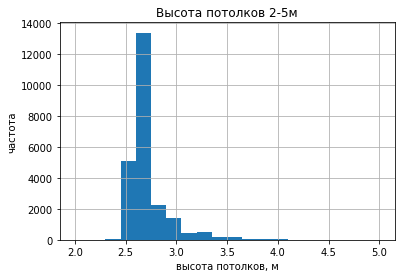

In [42]:
ax = data['ceiling_height'].plot(
    kind='hist',
    bins=20,
    grid=True,
    range=(2, 5)
)
ax.set_title('Высота потолков 2-5м')
ax.set_xlabel('высота потолков, м')
ax.set_ylabel('частота')
plt.show()

Ожидаемо пик наблюдается в районе 2.7 м - стандартная высота птолков.

Изучим время продажи квартир:

In [43]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

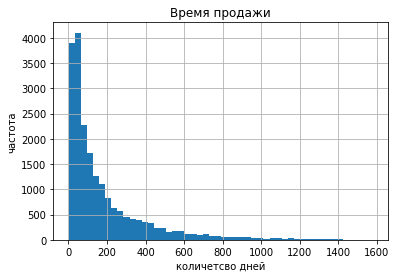

In [44]:
ax = data['days_exposition'].plot(
    kind='hist',
    bins=50,
    grid=True
)
ax.set_title('Время продажи')
ax.set_xlabel('количетсво дней')
ax.set_ylabel('частота')
plt.show()

Гистограмма распределение времени продаж квартир похожа на распределение Пуассона. Видно, что большинство квартир продается в первые полгода и далее продажи снижаеются. 

Рассмотрим детальнее участок от 0 до 200, там наблюдается всплески количества продаж.


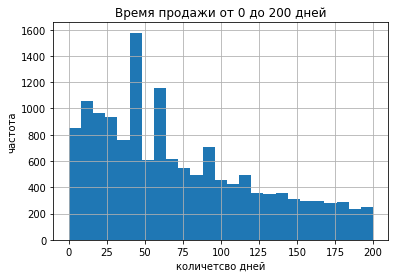

In [45]:
ax = data['days_exposition'].plot(
    kind='hist',
    bins=25,
    grid=True,
    range=(0, 200)
)
ax.set_title('Время продажи от 0 до 200 дней')
ax.set_xlabel('количетсво дней')
ax.set_ylabel('частота')
plt.show()

Есть частые продажи за 45 дней и за 60 дней. Посмотрим топ-10 самых частых значений дней продаж:

In [46]:
data['days_exposition'].value_counts().head(10)

45    880
60    538
7     234
30    208
90    204
4     176
3     158
5     152
14    148
9     143
Name: days_exposition, dtype: int64

Наиболее частые продажи происходили до 100 дней. Среднее время продажи составляет 180 дней, медиана - 95 дней.Есть продажи необычайно долгие - более 1500 дней и очень быстрые - 1 день. Интересно, что в пятерке лидеров четыре значения кратные 15: квартиры продавались за 15, 30, 45 и 90 дней. 

Уберем обнаруженные редкие и выбивающиеся значения.

1. При изучении продаж в разрезе площадей было выявлено, что редко встречаются предложения меньше 20 метров и больше 300, максимальное значение 900. Оценим долю значений больше 300 метров:

In [47]:
len(data.query('total_area > 300')) / len(data)

0.0025739482678594034

Значений меньше 0.3%, уберем их.

In [48]:
data = data.query('total_area <= 300')

In [49]:
data['total_area'].describe()

count    23638.000000
mean        59.451020
std         30.540964
min         12.000000
25%         40.000000
50%         52.000000
75%         69.400000
max        300.000000
Name: total_area, dtype: float64

2. При изучении продаж в разрезе цен было определены выбросы и редкие значения на участках менее 400 тыс и более 500 млн. Оценим их количество: 

In [50]:
(len(data.query('last_price < 400000')) + len(data.query('last_price > 50000000'))) / len(data)

0.0042304763516371946

Около 0.4%. Уберем их.

In [51]:
data = data.query('last_price >= 400000 and last_price <= 50000000')

In [52]:
data['last_price'].describe()

count    2.353800e+04
mean     5.966412e+06
std      4.876458e+06
min      4.300000e+05
25%      3.400000e+06
50%      4.600000e+06
75%      6.700000e+06
max      5.000000e+07
Name: last_price, dtype: float64

3. Рассмотрим выбивающиеся данные по количеству комнат. Ранее было определено наличие непонятных данных с количеством комнат 0, и единичные значения свыше 8 комнат.

In [53]:
len(data.query('rooms == 0'))

196

In [54]:
len(data.query('rooms > 8'))

11

Убираем эти данные

In [55]:
data = data.query('rooms <= 8')

In [56]:
data['rooms'].describe()

count    23527.000000
mean         2.046415
std          1.017932
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

4. При изучении высоты потолков было выявлено, что основные значения сосредоточены в диапазоне 2-5 метров. Посмотрим количество высот вне этого диапазона.

In [57]:
len(data.query('ceiling_height > 5'))

32

In [58]:
len(data.query('ceiling_height < 2'))

3

Количество выбивающихся значений невелико, удалим их.

In [59]:
data = data.query('ceiling_height >= 2 and ceiling_height <= 5')

In [60]:
data['ceiling_height'].describe()

count    23492.000000
mean         2.693108
std          0.209480
min          2.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          5.000000
Name: ceiling_height, dtype: float64

Убрали редкие и выбивающиеся значения, всего отброшено около 1% записей.

In [61]:

data[['last_price', 'total_area','rooms', 'ceiling_height' ]].describe().loc[['min', 'max']]

,last_price,total_area,rooms,ceiling_height
min,430000.0,12.0,0.0,2.0
max,50000000.0,297.5,8.0,5.0


Изучим факторы больше всего влияющие на стоимость квартиры. Посмотрим на зависимость цены от площади. Посчитаем коэффициент корреляции Пирсона:

In [62]:
(data['last_price'].astype(float)).corr(data['total_area'])

0.7785802418981189

Пострим матрицу рассеяния

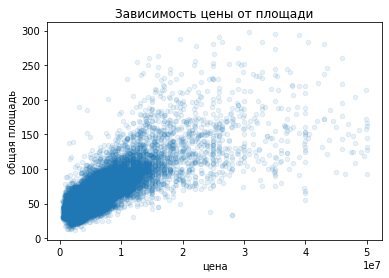

In [63]:
ax = data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)
ax.set_title('Зависимость цены от площади')
ax.set_xlabel('цена')
ax.set_ylabel('общая площадь')
plt.show()

Корреляция довольно высокая, цена сильно завивсит от метража. На матрице рассеяния видна эта же зависимость, есть отклонения растущие с ростом цены и метража.

Посмотрим на зависимость цены от числа комнат. Посчитаем коэффициент корреляции Пирсона и построим матрицу рассеяния:

In [64]:
(data['last_price'].astype(float)).corr(data['rooms'])

0.4936291444520382

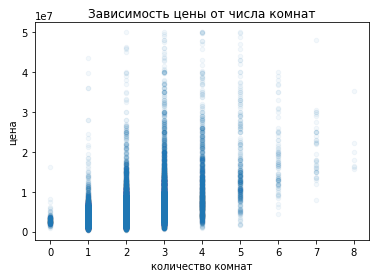

In [65]:
ax = data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05)
ax.set_title('Зависимость цены от числа комнат')
ax.set_xlabel('количество комнат')
ax.set_ylabel('цена')
plt.show()

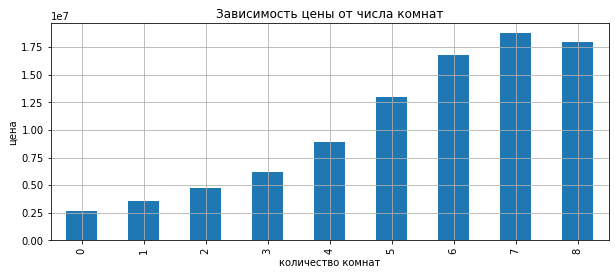

In [66]:
ax = (
        data.pivot_table(index='rooms', values='last_price', aggfunc='median')
        .plot(
            kind='bar',
            grid=True,
            figsize=(10, 4))
)
ax.set_title('Зависимость цены от числа комнат')
ax.set_xlabel('количество комнат')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

Зависимость цены от количества комнат прослеживается, особенно видно на графике с медианной ценой в разрезе количества комнат.

Посмотрим на зависимость цены от удаленности от центра.

In [67]:
(data['last_price'].astype(float)).corr(data['cityCenters_nearest'].astype(float))

-0.3352032482263991

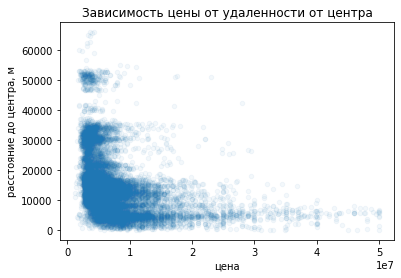

In [68]:
ax = data.plot(x='last_price', y='cityCenters_nearest', kind='scatter', alpha=0.05)
ax.set_title('Зависимость цены от удаленности от центра')
ax.set_xlabel('цена')
ax.set_ylabel('расстояние до центра, м')
plt.show()

Коэффициент корреляции Пирсона демонстрирует обратную зависимоть - с удалением от центра цена снижается. На графике это также прослеживается.

Посмотрим на зависимость цены от этажа расположения:

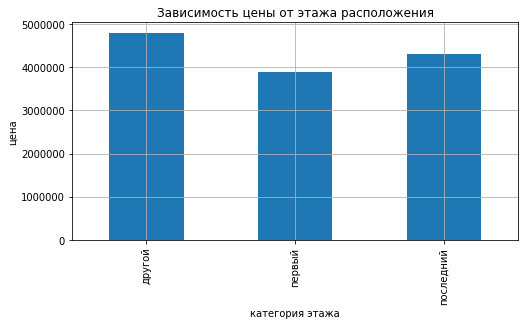

In [69]:
ax = (
        data.pivot_table(index='floor_category', values='last_price', aggfunc='median')
        .plot(
            kind='bar',
            grid=True,
            figsize=(8, 4))
)
ax.set_title('Зависимость цены от этажа расположения')
ax.set_xlabel('категория этажа')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

Меньше всех ценятся квартиры на первом этаже, последний этаж по ценам выше пертвого, но уступает другим.

Попробуем определить зависимость ценовых предложений от дня недели, месяца, года подачи объявлений

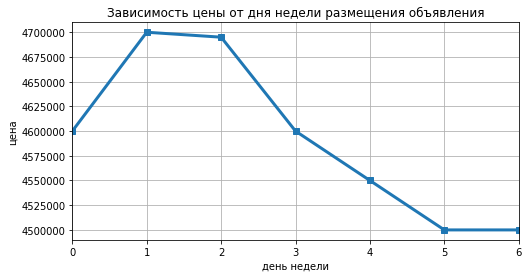

In [70]:
ax = (
        data.pivot_table(index='dayofweek_publication', values='last_price', aggfunc='median')
        .plot(
            grid=True,
            linewidth = 3,
            marker = 's',
            figsize=(8, 4))
)
ax.set_title('Зависимость цены от дня недели размещения объявления')
ax.set_xlabel('день недели')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

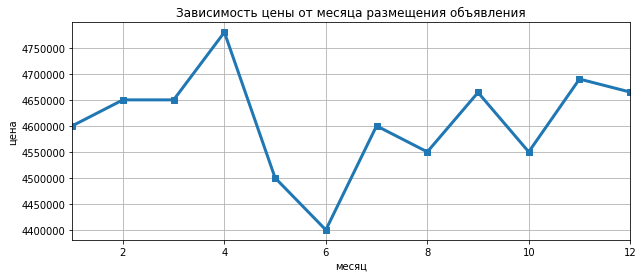

In [71]:
ax = (
        data.pivot_table(index='month_publication', values='last_price', aggfunc='median')
        .plot(
            grid=True,
            linewidth = 3,
            marker = 's',
            figsize=(10, 4))
)
ax.set_title('Зависимость цены от месяца размещения объявления')
ax.set_xlabel('месяц')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

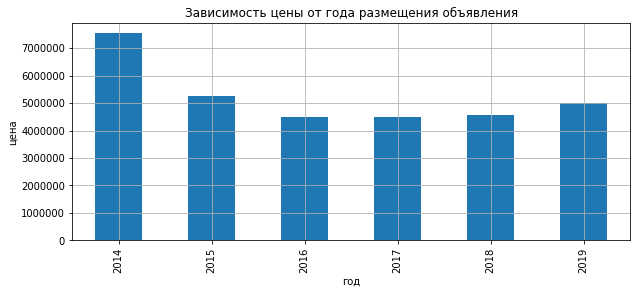

In [72]:
ax = (
        data.pivot_table(index='year_publication', values='last_price', aggfunc='median')
        .plot(
            kind='bar',
            grid=True,
            figsize=(10, 4))
)
ax.set_title('Зависимость цены от года размещения объявления')
ax.set_xlabel('год')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

Цена продажи была выше при размещении объявлений во вторник и в апреле и ниже, если это были суббота или воскресенье и июнь месяц. По году подачи наблюдается всплеск в 2014 году, природа его не ясна, возможно это как-то связано с курсами валют, какими-то экономческими причинами. Далее наблюдается снижение до 2016г. и после постоянный постепенный рост цен. 

Выберем 10 населённых пунктов с наибольшим числом объявлений

In [73]:
locality_name_select_top10 = data['locality_name'].value_counts().head(10)

In [74]:
locality_name_select_top10

Санкт-Петербург      15531
посёлок Мурино         520
посёлок Шушары         440
Всеволожск             398
Пушкин                 367
Колпино                337
посёлок Парголово      327
Гатчина                306
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Отсортируем  и определим среди них населённые пункты с самой высокой и низкой стоимостью жилья

In [75]:
locality_name_top10 = locality_name_select_top10.index

In [76]:
locality_name_top10_price = data.query('locality_name in @locality_name_top10').pivot_table(
    index='locality_name', values='meter_price', 
    aggfunc='mean').sort_values(
    by='meter_price', ascending=False)
locality_name_top10_price.columns = ['mean price for square meter']
locality_name_top10_price.reset_index(inplace=True)
locality_name_top10_price

,locality_name,mean price for square meter
0,Санкт-Петербург,112259.082416
1,Пушкин,103130.852861
2,деревня Кудрово,92473.588629
3,посёлок Парголово,90175.886850
4,посёлок Мурино,85725.234615
5,посёлок Шушары,78677.379545
6,Колпино,75333.287834
7,Гатчина,68757.643791
8,Всеволожск,68654.474874
9,Выборг,58141.919831


Самая высокая средняя цена квадратного метра жилья в Санкт-Петербурге - 112185 руб, завершает десятку лидеров Выборг - 58141 руб, почти в 2 раза меньше.

Добавим в таблицу столбец с расстоянием до центра в км

In [77]:
data['cityCenter_km'] = round(data['cityCenters_nearest'] / 1000).astype('Int64')

Выделим квартиры в Санкт-Петербурге

In [78]:
data_flats_Petersburg = data.query('locality_name == "Санкт-Петербург"')
data_flats_Petersburg.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,meter_price,dayofweek_publication,month_publication,year_publication,floor_category,living_to_total_ratio,kitchen_to_total_ratio,cityCenter_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,755,NaN,120370,3,3,2019,другой,0.47,0.23,16
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,574,558,92786,3,8,2015,другой,0.61,0.15,14
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,48,121,100000,1,6,2018,другой,0.32,0.41,8
7,5,7915000,71.6,2019-04-18,2,2.65,24,NaN,22,False,...,NaN,NaN,110545,3,4,2019,другой,NaN,0.26,12
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,NaN,289,88525,6,2,2017,другой,0.71,0.11,15


Пострим график зависимости средней цены квадратного метра от удаленности от центра

In [79]:
price_relation_distance = data_flats_Petersburg.pivot_table(
    index='cityCenter_km', values='meter_price', 
    aggfunc='mean')
price_relation_distance.head()

,meter_price
cityCenter_km,
0,207075.869565
1,146242.965714
2,136788.833910
3,118543.119534
4,127617.857567


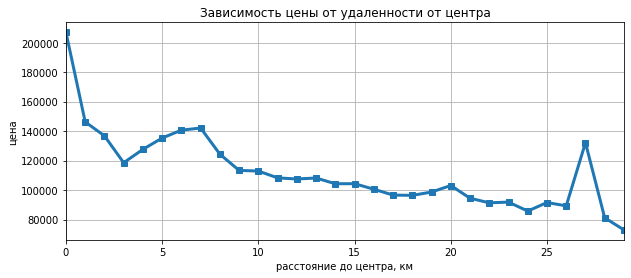

In [80]:
ax = (
        price_relation_distance.plot(
            grid=True,
            linewidth = 3,
            marker = 's',
            figsize=(10, 4))
)
ax.set_title('Зависимость цены от удаленности от центра')
ax.set_xlabel('расстояние до центра, км')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

На графике виден тренд снижения цен с удалением от центра. Перелом и устойчивое  плавное снижение начианется после 8 км. Будем считать это границей центральной зоны. Выделим сегмент квартир в центре.

 Определим центральную зону в 3 км.

In [81]:
data_flats_Petersburg_Center = data_flats_Petersburg.query('cityCenter_km <= 3')
data_flats_Petersburg_Center.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,meter_price,dayofweek_publication,month_publication,year_publication,floor_category,living_to_total_ratio,kitchen_to_total_ratio,cityCenter_km
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,124,265,66872,5,10,2015,первый,0.48,0.20,2
99,32,9600000,90.0,2017-09-26,4,2.65,5,67.0,2,False,...,NaN,104,106667,1,9,2017,другой,0.74,0.09,3
138,8,4800000,40.0,2017-11-18,2,2.65,3,29.0,2,False,...,729,80,120000,5,11,2017,другой,0.72,0.15,3
154,1,8200000,80.0,2018-11-06,3,4.15,3,44.2,2,False,...,838,38,102500,1,11,2018,другой,0.55,0.15,3
179,5,14800000,108.7,2019-04-11,3,4.00,5,72.4,5,False,...,NaN,NaN,136155,3,4,2019,последний,0.67,0.07,3


Пострим гистограммы для этой территории по параметрам: площадь, цена, число комнат, высота потолков.

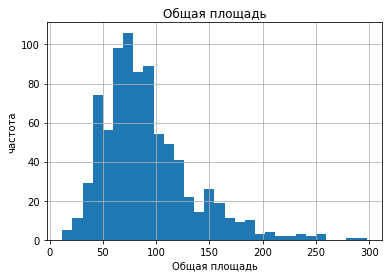

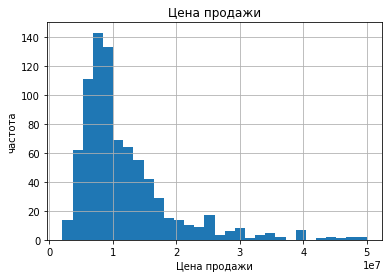

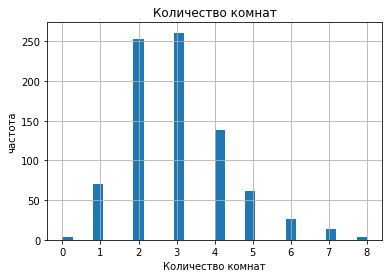

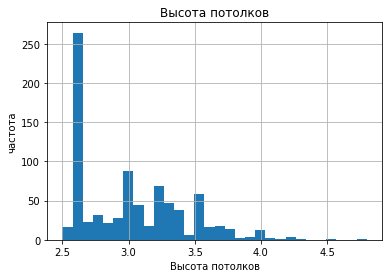

In [82]:
list_parametr = ['total_area', 'last_price', 'rooms', 'ceiling_height']
list_name_parametr = ['Общая площадь', 'Цена продажи', 'Количество комнат','Высота потолков']
for i in range(0, len(list_parametr)):
    ax = data_flats_Petersburg_Center[list_parametr[i]].plot(
        kind='hist',
        bins=30,
        grid=True
    )
    ax.set_title(list_name_parametr[i])
    ax.set_xlabel(list_name_parametr[i])
    ax.set_ylabel('частота')
    plt.show()

В центре города заметно больше предложений большей площади, наиболее часто продаются квартиры площадью 50, 70-100 метров, в отличие от общей стстистики много предложений больше 100 метров.  Цены чаще всего в диапазоне 5-15 млн. Есть предложения за 50 млн. В отличие от общей картины, в центре самые распространенные не 1-2 комнатные, а 2-3 комнатные. Много предложений 4-х комнатных квартир, больше чем 1 комнатных. С высостой потолков тоже есть отличия. Здесь также преобладают стандартыне значения типовой застройки на уровне 2.6 метра. Но наблюдается пик около 3 метров и довольно много значенйи лежат в диапазоне от 3 до 4 метров. Видимо в центре распространено элитное жилье и много домов старой постройки.

Определим факторы, которые влияют на стоимость квартиры в центре города (число комнат, этаж, удалённость от центра, дата размещения объявления). Для количественных данных посмотрим коэффициент корелляции и сравним с данными по всему городу.

In [83]:
print('Корреляция между ценой, числом комнат и удаленностью от центра для центра города')
corr_matrix_Petersburg_Center = data_flats_Petersburg_Center[['last_price', 'rooms', 'cityCenters_nearest']].corr()
print(corr_matrix_Petersburg_Center)
print()
print('Корреляция между ценой, числом комнат и удаленностью от центра для всего города')
corr_matrix_Petersburg = data_flats_Petersburg[['last_price','rooms', 'cityCenters_nearest']].corr()
print(corr_matrix_Petersburg)

Корреляция между ценой, числом комнат и удаленностью от центра для центра города
                     last_price     rooms  cityCenters_nearest
last_price             1.000000  0.383494            -0.196527
rooms                  0.383494  1.000000            -0.051498
cityCenters_nearest   -0.196527 -0.051498             1.000000

Корреляция между ценой, числом комнат и удаленностью от центра для всего города
                     last_price     rooms  cityCenters_nearest
last_price             1.000000  0.519250            -0.406075
rooms                  0.519250  1.000000            -0.281342
cityCenters_nearest   -0.406075 -0.281342             1.000000


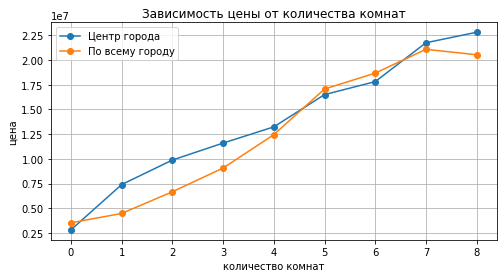

In [84]:
select_Petersburg_Center_rooms = data_flats_Petersburg_Center.pivot_table(
        index='rooms', values='last_price', aggfunc='mean')
select_Petersburg_rooms = data_flats_Petersburg.pivot_table(
        index='rooms', values='last_price', aggfunc='mean')

fig, ax = plt.subplots()
ax.plot(select_Petersburg_Center_rooms,
        label = 'Центр города',
        marker = 'o')
ax.plot(select_Petersburg_rooms,
        label = 'По всему городу',
        marker = 'o')
ax.legend()
ax.set_title('Зависимость цены от количества комнат')
ax.set_xlabel('количество комнат')
ax.set_ylabel('цена')
ax.grid()

fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()  

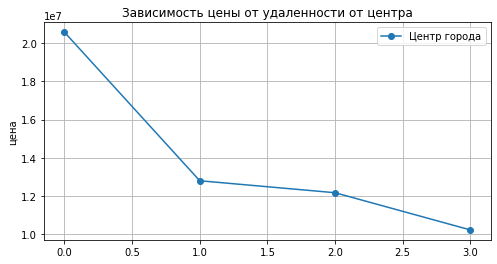

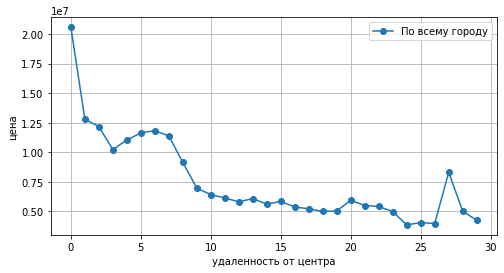

In [85]:
select_Petersburg_Center_cityCenter_km = data_flats_Petersburg_Center.pivot_table(
        index='cityCenter_km', values='last_price', aggfunc='mean')

select_Petersburg_cityCenter_km = data_flats_Petersburg.pivot_table(
        index='cityCenter_km', values='last_price', aggfunc='mean')

fig, ax = plt.subplots()

ax.plot(select_Petersburg_Center_cityCenter_km,
        label = 'Центр города',
        marker = 'o')

ax.legend()
ax.set_title('Зависимость цены от удаленности от центра')
#ax.set_xlabel('удаленность от центра')
ax.set_ylabel('цена')
ax.grid()

fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

fig, ax1 = plt.subplots()

ax1.plot(select_Petersburg_cityCenter_km,
        label = 'По всему городу',
        marker = 'o')

ax1.legend()
ax1.set_xlabel('удаленность от центра')
ax1.set_ylabel('цена')
ax1.grid()

fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

Судя по графикам прямо прослеживается связь между ценой и количеством комнат, она почти линейна и схожа что в центре, что в целом по городу. Корреляция цены и удаленности от центра отрицательная и в центральной части города очень слабая -0.09, в целом по городу эта связь на уровне -0.4 (слабая корреляция). Но графики демонстрируют зависимость, в центре города она почти линейна, в целом по городу также прослеживается, но имеет ряд пиков и падений, отражающих видимо наличие участков с более дорогой или дешевой недвижимостью в других районах города.


Рассмотрим как зависит цена от этажа квартиры для центра города

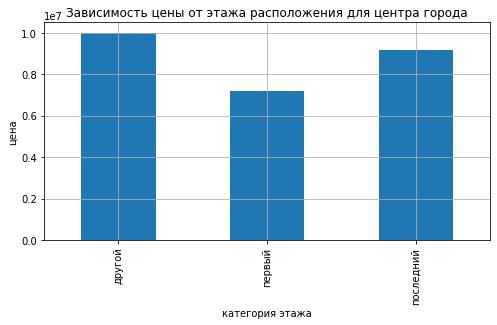

In [86]:
ax = (
        data_flats_Petersburg_Center.pivot_table(index='floor_category', values='last_price', aggfunc='median')
        .plot(
            kind='bar',
            grid=True,
            figsize=(8, 4))
)
ax.set_title('Зависимость цены от этажа расположения для центра города')
ax.set_xlabel('категория этажа')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

И для всего города:

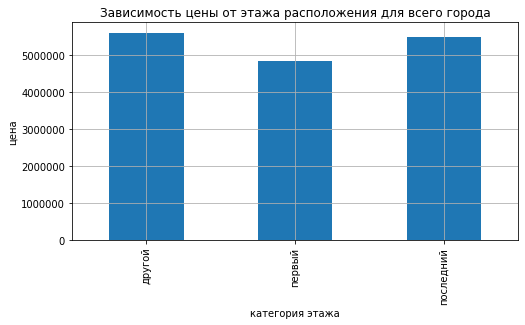

In [87]:
ax = (
        data_flats_Petersburg.pivot_table(index='floor_category', values='last_price', aggfunc='median')
        .plot(
            kind='bar',
            grid=True,
            figsize=(8, 4)
            )
)
ax.set_title('Зависимость цены от этажа расположения для всего города')
ax.set_xlabel('категория этажа')
ax.set_ylabel('цена')
ax.legend().remove()
plt.show()

Видно, что в центре заметно ниже цениться первый этаж. В целом по городу это снижение цены менее выражено. По другим этажам картина в центре и по городу мало отличается. 

Рассмотрим связь даты подачи объявления и цены продажи. Построим графики для центральной части города и для всго города.

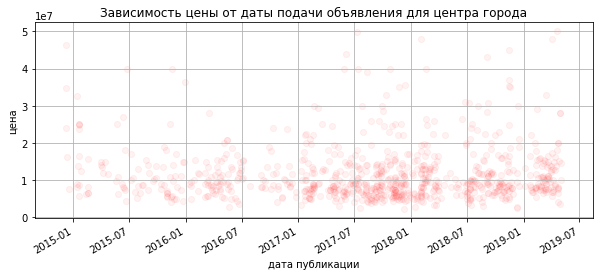

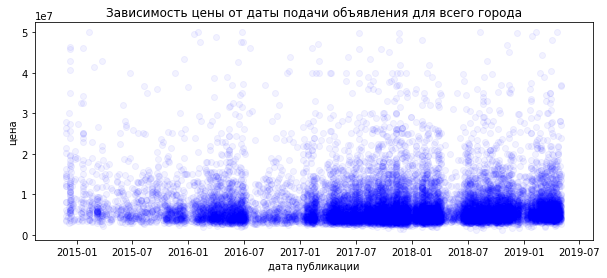

In [88]:
#plot Petersburg_Center
plt.figure(figsize=(10,4))
plt.scatter(
    data_flats_Petersburg_Center['first_day_exposition'],
    data_flats_Petersburg_Center['last_price'],
    color='red',
    alpha=0.05
    )
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.title('Зависимость цены от даты подачи объявления для центра города')
plt.xlabel('дата публикации')
plt.ylabel('цена')
plt.show()

#plot Petersburg
plt.figure(figsize=(10,4))
plt.scatter(
    data_flats_Petersburg['first_day_exposition'],
    data_flats_Petersburg['last_price'],
    color='blue',
    alpha=0.05
    )
plt.title('Зависимость цены от даты подачи объявления для всего города')
plt.xlabel('дата публикации')
plt.ylabel('цена')
plt.show()

В целом картина очень похожа. На обоих графиках наблюдаются снижение активности и цен в августе-декабре 2016, апрель-май 2018 и в январе 2019.

## Общий вывод

    Изучены данные объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Данные содержали 23699 записей, во многих столбцах имелись многочисленные пропуски. Пропуски могли образоваться в результате сбоев выгрузки, либо не заполнении необязательных значений, либо некорректной работе алгоритмов автоматического заполнения, возможно другие причины. После детального изучения некоторые пропуски были заполнены, также были приведены типы данных к соответствующим типу значений столбцов. В некоторых столбцах были обнаружены выбросы и аномальные значения, которые были удалены или заполнены подходящими.
    
    При изучении параметров: площадь, цена, число комнат, высота потолков., были сделаны следующие наблюдения: наиболее часто продаваемые квартиры площадью 30-50 метров, редко встречаются предложения меньше 20 метров и больше 300, отмечены несколько пиковых значений, очевидно связанных с метражом квартир стандартных планировок и типовым строительством, с ростом площади количество предложений снижается. Гистограмма распределения цен близка к нормальному распределению, пик предложений в районе 4-5 млн. Наиболее часто, практически в равной степени продаются 1,2-х комнатные квартиры, далее 3-комнатные. По высоте потолков все значения сосредоточились примерно до 4 метров. Что связано с тем, что строительство стандартизировано, стандартная высота потолков 2.5-2.7 м. В Санкт-Петербурге много домов старой постройки и элитного жилья, отсюда вероятно наличие высот 3-4 метра. Гистограмма распределение времени продаж квартир похожа на распределение Пуассона. Видно, что большинство квартир продается в первые полгода и далее вероятность продажи снижается. Наиболее частые продажи происходили до 100 дней. Среднее время продажи составляет 180 дней, медиана - 95 дней. Есть продажи необычайно долгие - более 1500 дней и очень быстрые - 1 день. 
    
    В процессе изучения факторов влияющих на стоимость квартиры были изучены следующие связи: зависимость цены от площади - корреляция довольно высокая 0.78, цена сильно зависит от метража, на матрице рассеяния видны отклонения растущие с ростом цены и метража. Зависимость цены от числа комнат также прослеживается и хорошо видна на графике с использованием медианной цены, зависимость цены от удаленности от центр является обратной - с удалением от центра цена снижается. Меньше всех ценятся квартиры на первом этаже, последний этаж по ценам выше первого, но уступает другим этажам. Цена продажи была выше при размещении объявлений во вторник и в апреле и ниже, если это были суббота или воскресенье и июнь месяц. По году подачи наблюдается всплеск в 2014 году, природа его не ясна, возможно это как-то связано с курсами валют, какими-то экономическими причинами. Далее наблюдается снижение до 2016г. и после постоянный постепенный рост цен.

    Были определены 10 населённых пунктов с наибольшим числом объявлений. Самая высокая средняя цена квадратного метра жилья в Санкт-Петербурге - 112185 руб, завершает десятку лидеров Выборг - 58141 руб. 

    Для Санкт-Петербурга были определены границы центральной области с радиусом в 8 км. Анализ предложений в центре и в целом по городу показал, что в центре города заметно больше предложений большей площади, наиболее часто продаются квартиры площадью 50, 70 метров, много предложений больше 100 метров. Цены чаще всего в диапазоне 5-10 млн. В отличие от общей картины, в центре самые распространенные не 1-2 комнатные, а 2-3 комнатные. Достаточно много предложений с количеством комнат от 4 до 7. С высотой потолков тоже есть отличия. В центре также преобладают стандартные значения типовой застройки на уровне 2.6 метра. Но наблюдается пик около 3 метров и довольно много значений лежат в диапазоне от 3 до 4 метров. Очевидно в центре распространено элитное жилье и много домов старой постройки.

    Сравнение факторов влияющих на стоимость квартиры в центре города и в целом по городу показало, что относительно высокая положительная связь наблюдается между ценой и количеством комнат, но в целом по городу эта связь немного выше. Корреляция цены и удаленности от центра отрицательная и в центральной части города низкая -0.09, тогда как в целом по городу этот коэффициент выше -0.4. Коэффициент корреляции для зависимости цены от этажа квартиры для центра города сравним с данными по всему городу. Выявлено, что в центре заметно ниже ценится первый этаж, а в целом по городу это снижение цены менее выражено. По другим этажам картина в центре и по городу не отличается. Для связи дата подачи объявления и цена продажи для центральной части города и для всего города ситуация мало отличается. Для обоих случаев наблюдаются снижение активности и цен в августе-декабре 2016, апреле-мае 2018 и в январе 2019.
